In [14]:

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import analyze_load_utils
import analyze_utils

import importlib

# EXPERIMENT CONFIGURATION

In [15]:
BASE = 'MAZE'
ENV = "Maze7-v0"
FRIENDLY_ENV = "MAZE 7" 
ER_SAMPLES_NUMBER_LIST = [1,3,5,13]
EXPERIMENT_NAME = "70"



In [16]:
importlib.reload(analyze_load_utils)
loader = analyze_load_utils.Loader(BASE, EXPERIMENT_NAME, ENV, BASE, ER_SAMPLES_NUMBER_LIST)
acs2_data, acs2er_data, acs2_data_full, acs2er_data_full = loader.load()

In [27]:
importlib.reload(analyze_utils)
config = analyze_utils.AnalyzerConfiguration(
  BASE_NAME=BASE, 
  EXP_NAME=EXPERIMENT_NAME,
  FRIENDLY_ENV_NAME=FRIENDLY_ENV,
  ENV_NAME=ENV,
  M=ER_SAMPLES_NUMBER_LIST,
  DATA_BASE_PATH=BASE)
analyzer = analyze_utils.Analyzer(acs2_data, acs2er_data, config, acs2_data_full, acs2er_data_full)

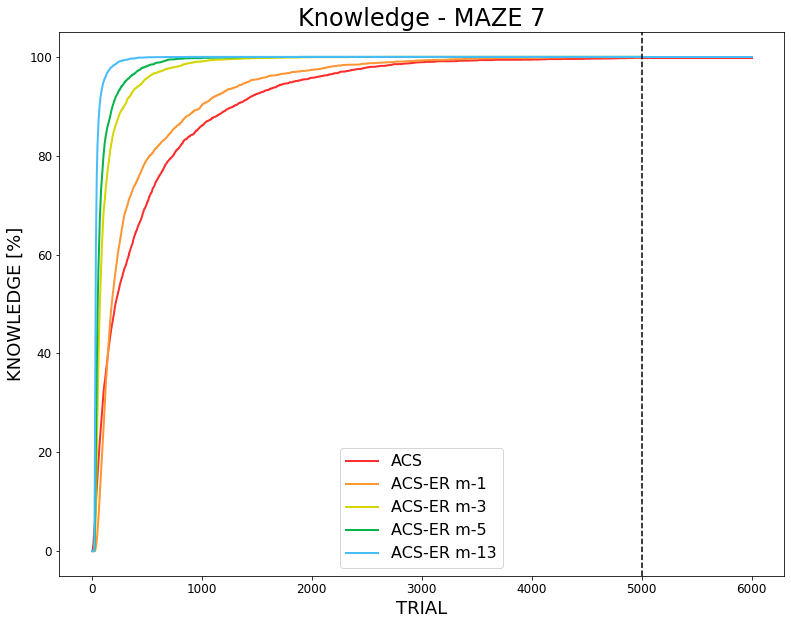

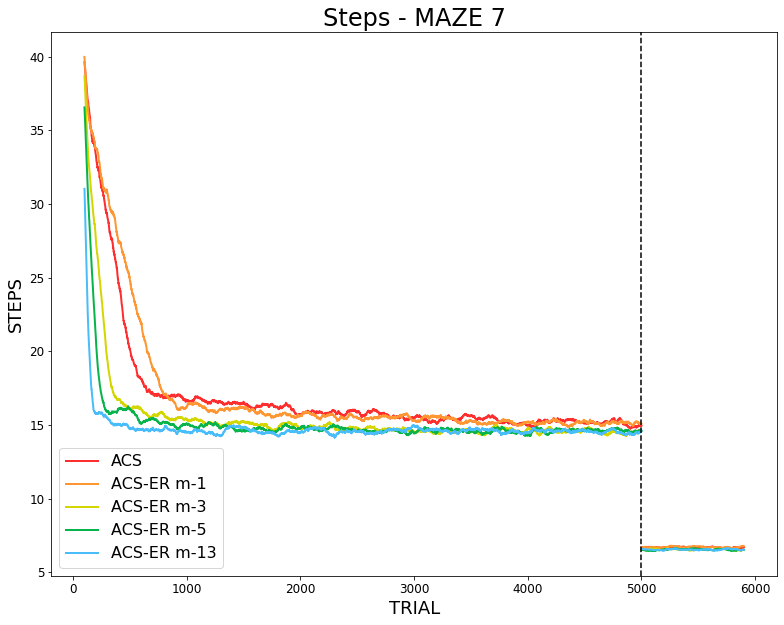

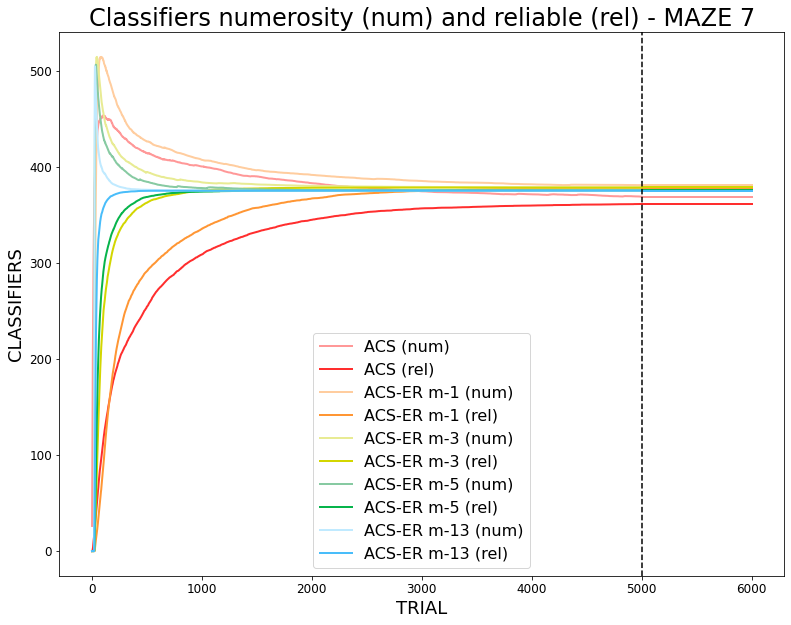

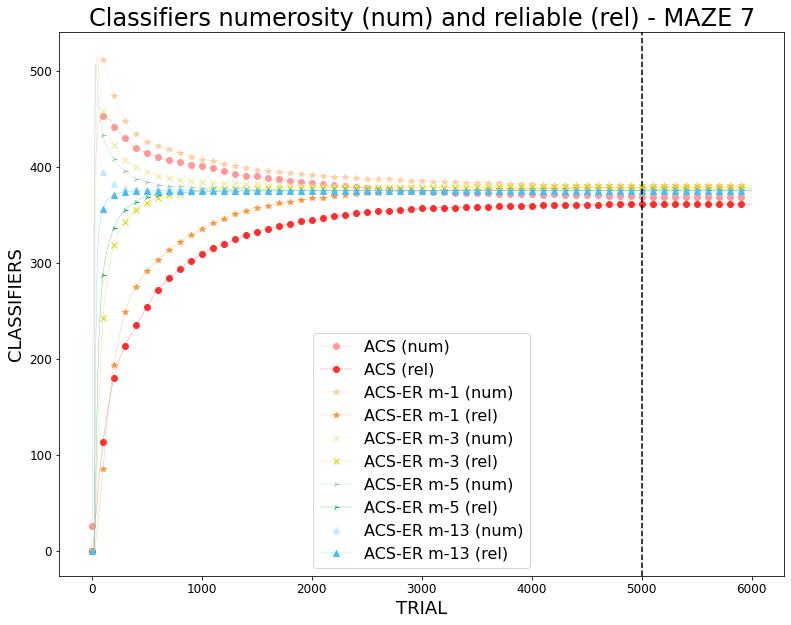

In [18]:
analyzer.plot_knowledge()
analyzer.plot_steps(exploit_avg_win=100, explore_avg_win=100)
analyzer.plot_classifiers()
analyzer.plot_classifiers(use_markers=True, density=100, width=0.25)

In [29]:
analyzer.print_knowledge_above_threshold(95) # it is just average

print("\n", '########', '\n', "WELCH's T-test:")

analyzer.compare_knowledge_above_threshold_welch_test(95) # all 30 observations used

ACS: Knowledge over 95 % at trial 1841.0
ACS-ER m-1: Knowledge over 95 % at trial 1427.0
ACS-ER m-3: Knowledge over 95 % at trial 467.0
ACS-ER m-5: Knowledge over 95 % at trial 303.0
ACS-ER m-13: Knowledge over 95 % at trial 108.0

 ######## 
 WELCH's T-test:
             ACS                  ACS-ER m-1          ACS-ER m-3          ACS-ER m-5         ACS-ER m-13
-----------  -------------------  ------------------  ------------------  -----------------  -----------------
ACS          s: 0.0, p: 1.0       s: 3.126, p: 0.003  s: 16.006, p: 0.0   s: 18.605, p: 0.0  s: 21.442, p: 0.0
ACS-ER m-1   s: -3.126, p: 0.003  s: 0.0, p: 1.0      s: 9.763, p: 0.0    s: 11.677, p: 0.0  s: 13.869, p: 0.0
ACS-ER m-3   s: -16.006, p: 0.0   s: -9.763, p: 0.0   s: 0.0, p: 1.0      s: 4.327, p: 0.0   s: 10.948, p: 0.0
ACS-ER m-5   s: -18.605, p: 0.0   s: -11.677, p: 0.0  s: -4.327, p: 0.0   s: 0.0, p: 1.0     s: 9.153, p: 0.0
ACS-ER m-13  s: -21.442, p: 0.0   s: -13.869, p: 0.0  s: -10.948, p: 0.0  s: -9.1